In [46]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import lines as mlines
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
import pandas as pd
import numpy as np
my_data = pd.read_csv("/Users/badbihhh/Documents/TEST.csv")

In [47]:
my_data.head()

,id,destination,airline,year,month,day,schedule,departure,delayed,temperature,relative-humidity,total-precipitation,snowfall-amount,high-cloud-cover,medium-cloud-cover,low-cloud-cover,sunshine-duration,wind-speed,wind-direction,wind-gust
0,IB6011,Montevideo MVD,Iberia,2019,10,8,00:05,00:04,0,15.87,45.0,0.0,0.0,0.0,0.0,0.0,-999.0,11.21,42.40,18.36
1,LP2485,Lima LIM,LAN Peru,2019,10,8,00:55,00:51,0,15.87,45.0,0.0,0.0,0.0,0.0,0.0,-999.0,11.21,42.40,18.36
2,AZ59,Rome FCO,Alitalia,2019,10,8,05:50,05:42,0,12.29,46.0,0.0,0.0,0.0,0.0,0.0,0.0,7.93,39.47,19.80
3,KL1698,Amsterdam AMS,KLM,2019,10,8,06:00,05:57,0,11.70,47.0,0.0,0.0,0.0,0.0,0.0,0.0,7.39,46.97,18.00
4,AF1401,Paris CDG,Air France,2019,10,8,06:00,06:06,1,11.70,47.0,0.0,0.0,0.0,0.0,0.0,0.0,7.39,46.97,18.00


In [48]:
my_data.dtypes

id                      object
destination             object
airline                 object
year                     int64
month                    int64
day                      int64
schedule                object
departure               object
delayed                  int64
temperature            float64
relative-humidity      float64
total-precipitation    float64
snowfall-amount        float64
high-cloud-cover       float64
medium-cloud-cover     float64
low-cloud-cover        float64
sunshine-duration      float64
wind-speed             float64
wind-direction         float64
wind-gust              float64
dtype: object

In [49]:
my_data.describe()

,year,month,day,delayed,temperature,relative-humidity,total-precipitation,snowfall-amount,high-cloud-cover,medium-cloud-cover,low-cloud-cover,sunshine-duration,wind-speed,wind-direction,wind-gust
count,8116.0,8116.0,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8116.0,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000
mean,2019.0,10.0,17.544480,0.560128,16.538503,57.184574,0.035165,0.0,15.488172,23.775628,23.813085,24.386832,10.681392,192.054782,15.736205
std,0.0,0.0,5.771143,0.496402,5.899440,18.540072,0.208898,0.0,30.422921,40.221194,40.193021,35.446106,6.476444,89.699723,9.013485
min,2019.0,10.0,8.000000,0.000000,3.740000,23.000000,0.000000,0.0,0.000000,0.000000,0.000000,-999.000000,0.800000,2.050000,1.440000
25%,2019.0,10.0,13.000000,0.000000,12.210000,42.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,6.370000,97.770000,8.640000
50%,2019.0,10.0,18.000000,1.000000,16.060000,54.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,8.590000,226.040000,13.680000
75%,2019.0,10.0,23.000000,1.000000,20.280000,72.000000,0.000000,0.0,15.000000,34.000000,22.000000,60.000000,15.190000,247.170000,21.240000
max,2019.0,10.0,27.000000,1.000000,29.640000,97.000000,8.300000,0.0,100.000000,100.000000,100.000000,60.000000,32.400000,360.000000,48.240000


In [50]:
my_data.columns

Index(['id', 'destination', 'airline', 'year', 'month', 'day', 'schedule',
       'departure', 'delayed', 'temperature', 'relative-humidity',
       'total-precipitation', 'snowfall-amount', 'high-cloud-cover',
       'medium-cloud-cover', 'low-cloud-cover', 'sunshine-duration',
       'wind-speed', 'wind-direction', 'wind-gust'],
      dtype='object')

In [51]:
my_data.columns = cervical_cancer_data.columns.str.lower()

In [52]:
my_data.columns

Index(['id', 'destination', 'airline', 'year', 'month', 'day', 'schedule',
       'departure', 'delayed', 'temperature', 'relative-humidity',
       'total-precipitation', 'snowfall-amount', 'high-cloud-cover',
       'medium-cloud-cover', 'low-cloud-cover', 'sunshine-duration',
       'wind-speed', 'wind-direction', 'wind-gust'],
      dtype='object')

In [53]:
import re

In [54]:
my_data.columns = [re.sub('[^a-z]+', '_', col) for col in my_data.columns]
my_data.columns

Index(['id', 'destination', 'airline', 'year', 'month', 'day', 'schedule',
       'departure', 'delayed', 'temperature', 'relative_humidity',
       'total_precipitation', 'snowfall_amount', 'high_cloud_cover',
       'medium_cloud_cover', 'low_cloud_cover', 'sunshine_duration',
       'wind_speed', 'wind_direction', 'wind_gust'],
      dtype='object')

In [55]:
my_data.columns = [re.sub('_$', '', col) for col in my_data.columns]
my_data.columns

Index(['id', 'destination', 'airline', 'year', 'month', 'day', 'schedule',
       'departure', 'delayed', 'temperature', 'relative_humidity',
       'total_precipitation', 'snowfall_amount', 'high_cloud_cover',
       'medium_cloud_cover', 'low_cloud_cover', 'sunshine_duration',
       'wind_speed', 'wind_direction', 'wind_gust'],
      dtype='object')

In [56]:
from matplotlib import pyplot as plt
%matplotlib inline

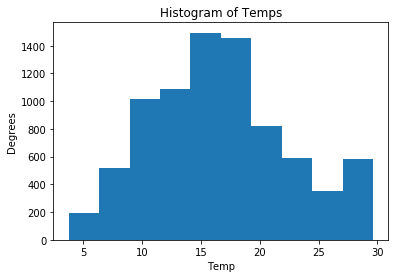

In [57]:
plt.hist(my_data['temperature'])
plt.xlabel("Temp")
plt.ylabel("Degrees")
plt.title("Histogram of Temps")
plt.show()

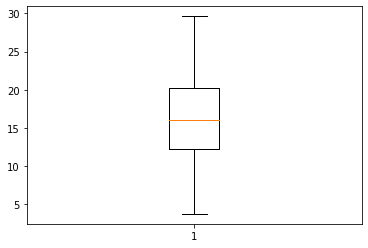

In [58]:
plt.boxplot(my_data['temperature'])
plt.show()

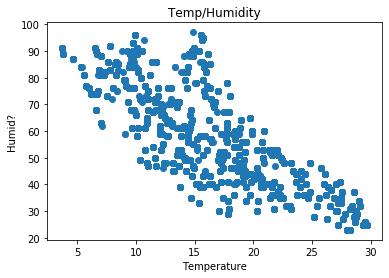

In [59]:
plt.scatter(cervical_cancer_data['temperature'], cervical_cancer_data['relative-humidity'])
plt.xlabel("Temperature")
plt.ylabel("Humid?")
plt.title("Temp/Humidity")
plt.show()

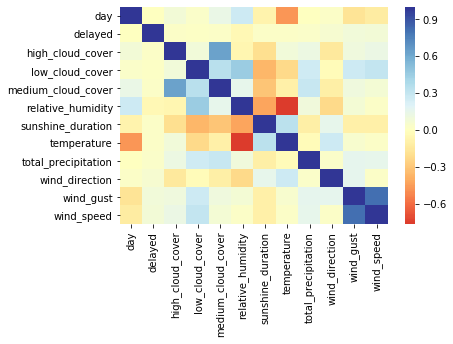

In [62]:
unwanted = []
for columnName, columnValue in my_data.iteritems():
    if type(columnValue[1]) == str:
        unwanted.append(columnName)
wanted = my_data.columns.difference(unwanted)
sns.heatmap(my_data[wanted].drop(['year','month','snowfall_amount'],axis=1).astype(float).corr(),cmap="RdYlBu",center=0);

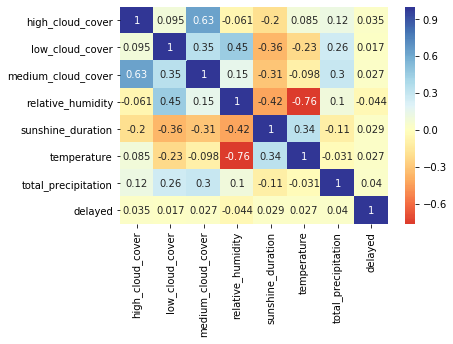

In [65]:
sns.heatmap(my_data[['high_cloud_cover','low_cloud_cover','medium_cloud_cover','relative_humidity','sunshine_duration','temperature','total_precipitation','delayed']].astype(float).corr(),cmap="RdYlBu",center=0,annot=True);

In [66]:
corr = my_data.corr()
corr.style.background_gradient()

,year,month,day,delayed,temperature,relative_humidity,total_precipitation,snowfall_amount,high_cloud_cover,medium_cloud_cover,low_cloud_cover,sunshine_duration,wind_speed,wind_direction,wind_gust
year,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
month,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
day,nan,nan,1,0.00162568,-0.471121,0.272432,0.0069512,nan,0.0813416,0.133589,0.0382723,-0.0715236,-0.12023,0.0333717,-0.177837
delayed,nan,nan,0.00162568,1,0.0272945,-0.0436911,0.0403319,nan,0.03493,0.0266998,0.017298,0.0292364,0.081745,0.0567442,0.0931275
temperature,nan,nan,-0.471121,0.0272945,1,-0.764515,-0.031362,nan,0.0854808,-0.0982367,-0.22586,0.338557,0.0216427,0.275194,0.0492819
relative_humidity,nan,nan,0.272432,-0.0436911,-0.764515,1,0.102876,nan,-0.0608485,0.150206,0.450023,-0.42061,0.0212607,-0.221666,0.0732486
total_precipitation,nan,nan,0.0069512,0.0403319,-0.031362,0.102876,1,nan,0.123231,0.296876,0.26218,-0.105049,0.150302,0.0357767,0.163115
snowfall_amount,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
high_cloud_cover,nan,nan,0.0813416,0.03493,0.0854808,-0.0608485,0.123231,nan,1,0.633669,0.094876,-0.196927,0.131197,-0.142492,0.107756
medium_cloud_cover,nan,nan,0.133589,0.0266998,-0.0982367,0.150206,0.296876,nan,0.633669,1,0.349828,-0.306479,0.0734952,-0.109699,0.108639


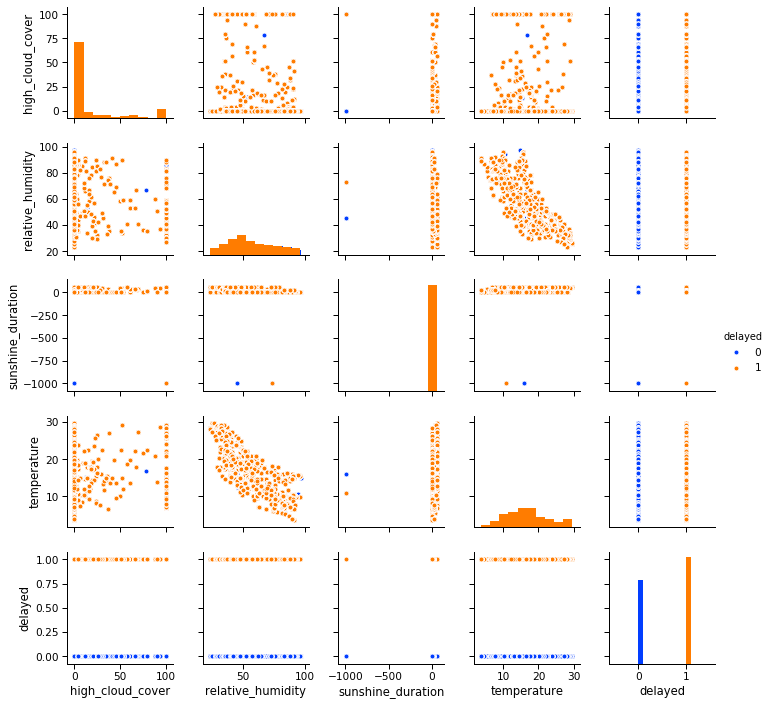

In [70]:
with sns.plotting_context("paper",font_scale=1.2):
    featurePlot = sns.pairplot(my_data[['high_cloud_cover','relative_humidity','sunshine_duration','temperature','delayed']],height=2,hue="delayed",palette="bright",kind="scatter",diag_kind="hist")